In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [2]:
file_path = '../output/rerun-bck-lowprob/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.05&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.15&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.25&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt']


In [3]:
cfg = get_config('../cfg/rerun_lower_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [4]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [5]:
print(orig)
print(wo_drop)
print(ours)

[4.928, 4.824, 4.944, 4.932, 4.96, 4.96, 4.988]
[4.004, 5.064, 5.844, 6.348, 6.76, 7.036, 7.28]
[3.98, 4.02, 4.056, 4.072, 4.092, 4.116, 4.228]


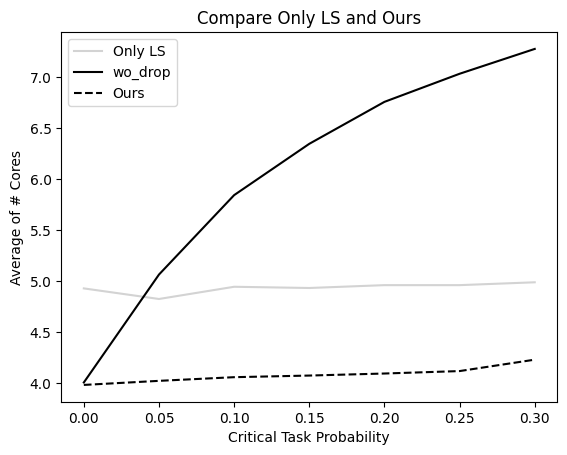

In [6]:
plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

In [42]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [43]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [44]:
print(orig)
print(wo_drop)
print(ours)

[8.44, 8.34, 8.28, 8.168, 8.092, 8.2, 8.248, 8.384, 8.38, 8.096, 8.292, 8.248, 8.208, 8.22, 8.212, 8.336, 8.22, 8.276, 8.148, 8.112, 8.188]
[3.984, 5.78, 7.212, 8.332, 9.276, 10.128, 11.036, 11.584, 11.84, 12.576, 12.624, 13.072, 13.196, 13.004, 13.004, 12.608, 12.436, 11.628, 10.596, 9.68, 8.188]
[3.984, 4.024, 4.128, 4.172, 4.256, 4.428, 4.5, 4.692, 4.884, 4.96, 5.188, 5.524, 5.652, 5.78, 6.168, 6.496, 6.644, 6.98, 7.312, 7.764, 8.188]


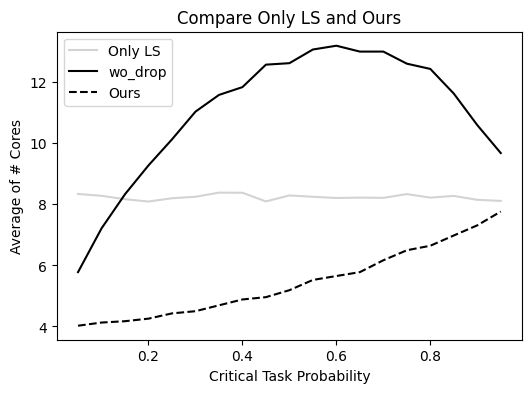

In [47]:
plt.figure(figsize=(6,4))

plt.plot(criticality_prob_list[1:-1], orig[1:-1], label='Only LS', color='lightgray')
plt.plot(criticality_prob_list[1:-1], wo_drop[1:-1], label='wo_drop', color='black')
plt.plot(criticality_prob_list[1:-1], ours[1:-1], label='Ours', color='black', linestyle='dashed')

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

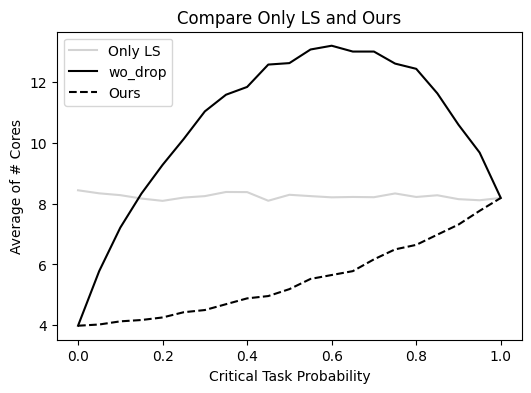

In [46]:
plt.figure(figsize=(6,4))

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()